# Project: Name Mall Customer segmantation

In [1]:
%matplotlib inline
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler # to minimize out liers / Normalization
from matplotlib import pyplot as plt

In [2]:
df=pd.read_csv("Mall_Customers.csv")
df.head(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [3]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.isnull()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
195,False,False,False,False,False
196,False,False,False,False,False
197,False,False,False,False,False
198,False,False,False,False,False


In [6]:
df.isnull().sum() # checking the nill valuves 

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

<h3 style='color:purple'>Detect outliers using percentile</h3>

In [7]:
max_thresold = df['Spending Score (1-100)'].quantile(0.95)
max_thresold

92.0

In [8]:
df[df['Spending Score (1-100)']>max_thresold]

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
7,8,Female,23,18,94
11,12,Female,35,19,99
19,20,Female,35,23,98
127,128,Male,40,71,95
141,142,Male,32,75,93
145,146,Male,28,77,97
163,164,Female,31,81,93
167,168,Female,33,86,95
185,186,Male,30,99,97


In [9]:
min_thresold = df['Spending Score (1-100)'].quantile(0.05)
min_thresold

6.0

In [10]:
df[df['Spending Score (1-100)']<min_thresold]

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
8,9,Male,64,19,3
22,23,Female,46,25,5
30,31,Male,60,30,4
32,33,Male,53,33,4
134,135,Male,20,73,5
140,141,Female,57,75,5
156,157,Male,37,78,1
158,159,Male,34,78,1
162,163,Male,19,81,5


In [11]:
df_precentile=df[(df['Spending Score (1-100)']<max_thresold) & (df['Spending Score (1-100)']>min_thresold)]
df_precentile

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [12]:
df.shape

(200, 5)

In [13]:
df_precentile.shape

(177, 5)

In [14]:
df.shape[0] - df_precentile.shape[0]

23

In [15]:
df=df_precentile

<h3 style='color:purple'>Detect outliers using IQR<h3>

In [16]:
# Q1 = df['Spending Score (1-100)'].quantile(0.25)
# Q3 = df['Spending Score (1-100)'].quantile(0.75)
# Q1, Q3

In [17]:
# IQR = Q3 - Q1
# IQR

In [18]:
# lower_limit = Q1 - 1.5*IQR
# upper_limit = Q3 + 1.5*IQR
# lower_limit, upper_limit

***Here are the outliers***

In [19]:
# df[(df['Spending Score (1-100)']<lower_limit)|(df['Spending Score (1-100)']>upper_limit)]

In [20]:
# df_no_outlier = df[(df['Annual Income (k$)']>lower_limit)&(df['Annual Income (k$)']<upper_limit)]
# df_no_outlier

In [21]:
# df_no_outlier.shape

In [22]:
# df.shape

In [23]:
# df.shape[0] - df_no_outlier.shape[0]

In [24]:
# df=df_no_outlier

In [25]:
X=df.drop(['CustomerID','Age'],axis='columns')
X.head()

,Genre,Annual Income (k$),Spending Score (1-100)
0,Male,15,39
1,Male,15,81
3,Female,16,77
4,Female,17,40
5,Female,17,76


In [26]:
dummies = pd.get_dummies(df.Genre) #created dummies beacause it only take integer vauves (i.l west windsor,monroe township and robinsville )
dummies

,Female,Male
0,0,1
1,0,1
3,1,0
4,1,0
5,1,0
...,...,...
195,1,0
196,1,0
197,0,1
198,0,1


In [27]:
df_dummies= pd.concat([df,dummies],axis='columns')
df_dummies

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Female,Male
0,1,Male,19,15,39,0,1
1,2,Male,21,15,81,0,1
3,4,Female,23,16,77,1,0
4,5,Female,31,17,40,1,0
5,6,Female,22,17,76,1,0
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,1,0
196,197,Female,45,126,28,1,0
197,198,Male,32,126,74,0,1
198,199,Male,32,137,18,0,1


In [28]:
df_dummies.drop(['CustomerID','Age','Genre'],axis='columns',inplace=True) 
df_dummies

,Annual Income (k$),Spending Score (1-100),Female,Male
0,15,39,0,1
1,15,81,0,1
3,16,77,1,0
4,17,40,1,0
5,17,76,1,0
...,...,...,...,...
195,120,79,1,0
196,126,28,1,0
197,126,74,0,1
198,137,18,0,1


No handles with labels found to put in legend.


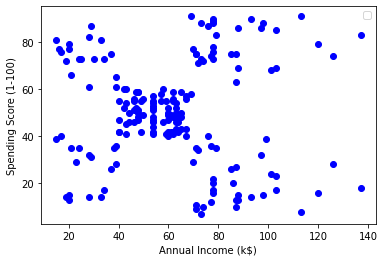

In [29]:
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'],color='blue')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
# plt.legend(loc='upper right',shadow=True,fontsize='large')
# plt.legend(loc='best')
plt.legend()

In [30]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
    sse.append(km.inertia_)

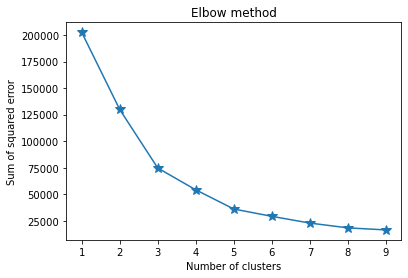

In [31]:
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse,marker='*',markersize=10)

In [32]:
km = KMeans(n_clusters=5) 
Y_predicted = km.fit_predict(df[['Annual Income (k$)','Spending Score (1-100)']])
Y_predicted

array([3, 1, 1, 3, 1, 1, 3, 3, 1, 3, 1, 3, 1, 3, 3, 1, 1, 3, 1, 3, 1, 3,
       1, 1, 3, 1, 3, 1, 3, 1, 3, 3, 1, 3, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 4, 0, 4, 2, 0, 4, 0, 4, 2, 4, 4, 0, 4, 0, 4, 2, 4, 0, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 4, 4, 0, 4, 0, 4, 0, 0, 4, 0, 4, 0, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4])

In [33]:
df['cluster']=Y_predicted # creating new colume and put y_predicted data into it 
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,3
1,2,Male,21,15,81,1
3,4,Female,23,16,77,1
4,5,Female,31,17,40,3
5,6,Female,22,17,76,1


In [34]:
km.cluster_centers_

array([[90.06666667, 19.4       ],
       [26.33333333, 74.        ],
       [55.5       , 49.375     ],
       [27.29411765, 26.64705882],
       [87.46875   , 79.40625   ]])

Text(0.5, 1.0, 'Clusters of customers')

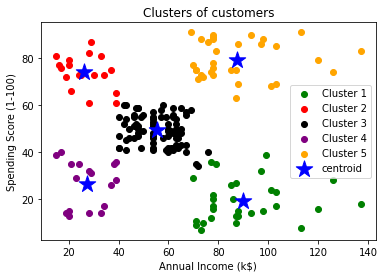

In [35]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
df4 = df[df.cluster==3]
df5 = df[df.cluster==4]
plt.scatter(df1['Annual Income (k$)'],df1['Spending Score (1-100)'],color='green',label = 'Cluster 1')
plt.scatter(df2['Annual Income (k$)'],df2['Spending Score (1-100)'],color='red',label = 'Cluster 2')
plt.scatter(df3['Annual Income (k$)'],df3['Spending Score (1-100)'],color='black',label = 'Cluster 3')
plt.scatter(df4['Annual Income (k$)'],df4['Spending Score (1-100)'],color='purple',label = 'Cluster 4')
plt.scatter(df5['Annual Income (k$)'],df5['Spending Score (1-100)'],color='orange',label = 'Cluster 5')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],s=300,color='blue',marker='*',label='centroid')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.title('Clusters of customers')

In [36]:
km.predict([[17,40]]) # Predicting in which cluster 

array([3])

In [37]:
km.predict([[10,80]])

array([1])

In [58]:
x = df[['Annual Income (k$)','Spending Score (1-100)']]
y = df.cluster

# from sklearn.metrics.cluster import completeness_score
# print(completeness_score([0, 0, 1, 1], [1, 1, 0, 0]))

In [61]:
from sklearn.metrics import silhouette_score
score = silhouette_score(x, km.labels_, metric='euclidean')
score

0.5529526332984916

In [62]:
score = silhouette_score(x, km.labels_, metric='manhattan')
score

0.5700183279831397

### Out come:

Cluster1 shows the customers with average salary and average spending so we can categorize these customers as

Cluster2 shows the customer has a high income but low spending, so we can categorize them as careful

Cluster3 shows the low income and also low spending so they can be categorized as sensible

Cluster4 shows the customers with low income with very high spending so they can be categorized as careless

Cluster5 shows the customers with high income and high spending so they can be categorized as target, and these customers can be the most profitable customers for the mall owner

In [40]:
#we use train and test in supervised learning 

In [41]:
scaler = MinMaxScaler()

scaler.fit(df[['Annual Income (k$)']])
df['Annual Income (k$)'] = scaler.transform(df[['Annual Income (k$)']])

scaler.fit(df[['Spending Score (1-100)']])
df['Spending Score (1-100)'] = scaler.transform(df[['Spending Score (1-100)']])